In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Step 2: Specifying the Ideal Target Segment

## Knock_out criteria
* Homogenous
* Distinct
* Matching the strength's of McDonald's
* Identifiable
* Reacheable

## Attractivenss criteria
* Positive perception of McDonald's
* Frequently eats out
* Likes fast food
* Wish to learn more about market segments which are currently not fond of McDonald's 

In [3]:
data = pd.read_csv("data/mcdonalds.csv")

In [4]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


# Step 4: Exploring Data

In [6]:
def lencoder(col):
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    return data[col]

In [7]:
for col in data.columns[:11]:
    data[col] = lencoder(col)

In [10]:
data[data.columns[:11]].mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

* The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald's as YUMMY, 91% believe that eating at McDonald's is CONVENIENT, but only 9% think that McDonald's food is SPICY 

In [11]:
# Principal Component Analysis
pca = PCA(random_state = 42)

In [12]:
pca.fit(data[data.columns[:11]])

PCA(random_state=42)

In [14]:
data_pca = pca.transform(data[data.columns[:11]])

In [16]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [15]:
pca.explained_variance_ratio_.cumsum()

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [17]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x}' for x in range(1, 12)])

In [18]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [19]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [20]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


 From Principal Components Analysis indicate that the first two components capture about 50% of the information contained in the segmentation variables.

In [21]:
# Factor Loadings
factor_loadings = pd.DataFrame(pca.components_, index = data.columns[:11], columns = df_pca.columns)

In [22]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
convenient,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
spicy,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
fattening,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
greasy,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
fast,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
cheap,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
tasty,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
expensive,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
healthy,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


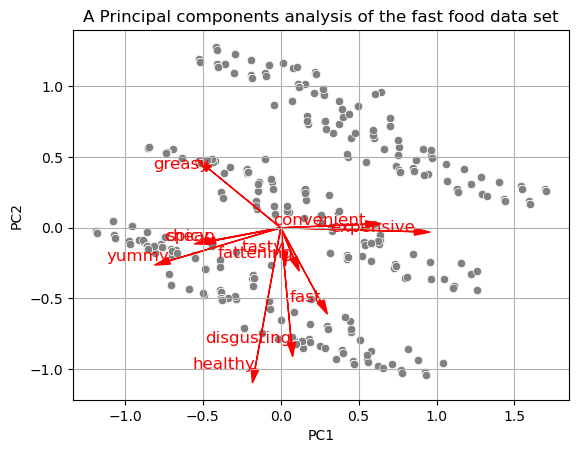

In [24]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 1.5, factor_loadings['PC2'][i] * 1.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 1.5, factor_loadings['PC2'][i]* 1.5, index_names[i], fontsize=12, ha='right', color = 'red')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the fast food data set')
plt.grid(True)
plt.show()

# Step 5: Extracting Segments

In [25]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data[data.columns[:11]]) for k in range(2, 9)]

In [26]:
wcss = [model.inertia_ for model in data_km28]

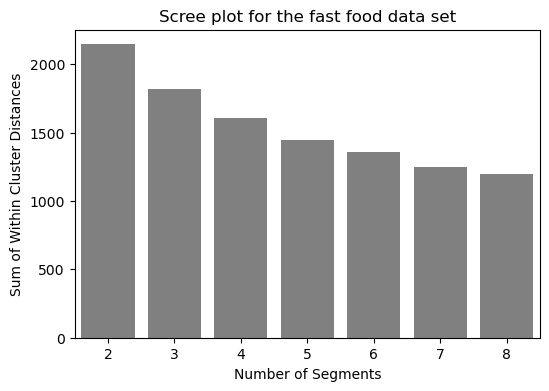

In [28]:
fig = plt.figure(figsize = (6,4))
ax = sns.barplot(x = list(range(2, 9)), y = wcss, color = 'grey')
plt.xlabel("Number of Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the fast food data set")
plt.show()

This scree plot does not provide useful guidance on the number of market segmentts to extract because the sum of distances drops dramatically is not visible.

In [68]:
def bootFlexclust(data, k, nboot = 100, ntimes = 100):
    ari_list = list()
    for i in range(ntimes):
        bootstrap_samples = [np.random.choice(np.arange(data.shape[0]), nboot, replace = True) for i in range(2)]
        df1 = df_pca.loc[bootstrap_samples[0]]
        df2 = df_pca.loc[bootstrap_samples[1]]
        kmeans1 = KMeans(n_clusters=k, n_init=10).fit(df1)
        kmeans2 = KMeans(n_clusters=k, n_init=10).fit(df2)
        ari = adjusted_rand_score(kmeans1.labels_, kmeans2.labels_)
        ari_list.append(ari)
    return ari_list
    

In [69]:
ari = bootFlexclust(df_pca, k = 2)

<Axes: >

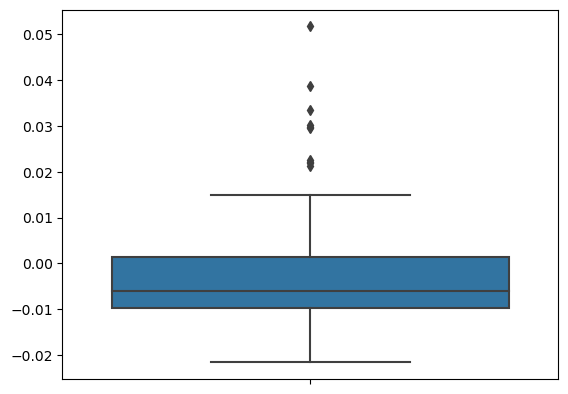

In [70]:
sns.boxplot(y = ari)

In [56]:
bootstrap_samples[0]

array([1126,  860, 1294, 1130, 1095, 1044,  121,  466, 1238,  330,   87,
       1396, 1123,  871,  130, 1332,  769,  343, 1437,  805,  385, 1215,
        955,  276, 1184,  459, 1337,   21,  252,  747,  856,  474, 1082,
        510,  699,  975,  189,  957,  686,  957,  562, 1267,  831, 1154,
        646,   20,  840,  166, 1297,  387,  600,  315,   13,  241,  776,
       1369,  564,  897, 1363,   91, 1390,  955, 1451,  508,  775,   34,
        205, 1104, 1411, 1025, 1021, 1413,  565, 1129,  702,  401,  729,
        161,  201,  995,  269,  815, 1294,  455, 1275, 1016,  295,  719,
        337,  878, 1076,  791,  216,  763,  187,  379,  492, 1064, 1180,
         14])

In [57]:
df_pca.loc[bootstrap_samples[0]]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
1126,1.597080,0.171645,-0.015864,0.245666,-0.314740,0.059773,-0.102416,-0.169168,0.048073,0.472552,0.424805
860,-0.852122,-0.149257,0.047150,-0.416501,-0.313605,-0.034602,-0.063662,0.073945,0.047327,0.030206,-0.012014
1294,0.400768,-0.884204,-0.163514,-0.215156,0.566228,0.080922,-0.107427,-0.004545,0.111163,0.070014,-0.075363
1130,-0.547679,-0.213096,-0.755223,-0.162540,0.047794,0.174745,-0.027493,-0.064296,0.044480,0.038914,-0.010372
1095,-0.302126,1.096756,0.543216,-0.113504,-0.114352,0.213813,0.294345,-0.626198,0.198767,0.061856,-0.263710
...,...,...,...,...,...,...,...,...,...,...,...
379,0.808264,-0.349388,0.699598,-0.218535,-0.395407,-0.236063,-0.129939,-0.173545,-0.034541,-0.656372,0.371615
492,0.118548,0.998823,-0.581516,-0.213683,0.173642,0.016644,-0.055428,-0.174817,0.035407,0.065225,-0.011157
1064,1.441749,0.188059,-0.078379,0.103241,-0.037132,-0.288057,-0.162154,-0.282247,0.029608,-0.193266,-0.116811
1180,0.273880,0.982409,-0.519001,-0.071258,-0.103966,0.364474,0.004310,-0.061738,0.053873,0.731043,0.530459
